# Part 7 of Links and Relationships: Link Rules - Part IV

This page is primarily based on the following page at the Circos documentation site:



- [7. Link Rules - Part IV](????????????)



That page is found as part number 4 of the ??? part ['Links and Relationships' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to Part 6 by clicking [here &#8592;](Links_Part6.ipynb).



----



5 --- Links and Relationships
=============================

7. Link Rules - Part IV
-----------------------

::: {#menu4}
[[Lesson](/documentation/tutorials/links/rules4/lesson){.clean}]{.active}
[Images](/documentation/tutorials/links/rules4/images){.normal}
[Configuration](/documentation/tutorials/links/rules4/configuration){.normal}
:::

Rules can be used to set formatting values based on a function of
characteristics of the link. For example, you can define the thickness
of the link line to be proportional to the size of the link\'s spans.

In previous examples, rules assigned constants to format parameters,
such as

```ini
<rule>
...
thickness = 2
color     = red
</rule>
```


To assign a value based on characteristics of the link, use `eval()`.
The expression within `eval()` must be valid Perl.

```ini
<rule>
...
thickness = eval(max(1,round(var(size1)/1000)))
</rule>
```


The argument to `eval()` will be parsed and its output value will be
assigned to the format parameter. In the above example, thickness will
the size of the link\'s first span, divided by 1000. If the span is
28kb, the thickness will be 28. In case the link is smaller than 500 bp,
I\'ve set the minimum thickness to be 1 by using `max(1,...)`.

For the image in this example, I\'ve set up four expressions that use
`eval()` to assign variable values to the thickness, radius, color and
z-depth of links.

```ini
<rule>
condition  = 1
thickness  = eval(sprintf("%d",remap_round(max(var(size1),var(size2)),1,25000,2,6)))
radius     = eval(sprintf("%fr",remap(min(var(size1),var(size2)),1,25000,0.5,0.999)))
color      = eval(sprintf("spectral-11-div-%d",remap_round(scalar min(var(size1),var(size2)),1,25000,1,11)))
z          = eval(int(max(var(size1),var(size2))/100))
</rule>
```


This single rule applies to all links, since the condition is always
true. For each formatting parameter, an expression that is a function of
the size of the link\'s spans is evaluated to obtain a value for the
parameter.

Thickness is scaled with the size of the larger span. Here
`max(var(size1),var(size2))` returns the larger of the two values and is
a Perl function. You can also use `min()`, if you need the smaller
value. The helper function `remap_round()` remaps the maximum size from
a range of \[1,25000\] to \[2,6\], which is assigned to the thickness.

Similar remappings are applied to the radius and color. In the case of
color, the target range is \[1,11\], which is the range of colors in the
Brewer spectral-11-div palette.

I have also assigned z-depth a value based on the link\'s span size.
This has the effect of drawing the links with larger spans last - these
would be the blue and purple links, as formatted by the expression that
assigns color. The z-depth expression effectively divides links into 100
bp bins based on the larger span size, with links in bins associated
with smaller spans drawn first. Avoid having too many bins - it can take
a long time for Circos to iterate through all the requested z-depths. In
fact, the rule in this example could just as well have been

```ini
z          = eval(int(max(var(size1),var(size2))/500))
```


or

```ini
z          = eval(int(max(var(size1),var(size2))/1000))
```


likely without much impact on the final image.




----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/5/7/

/home/jovyan/circos-tutorials-0.67/tutorials/5/7


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.40s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.40s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/5/7
debuggroup summary 0.40s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.40s loading configuration from file circos.conf
debuggroup summary 0.40s found conf file circos.conf
debuggroup summary 0.60s debug will appear for these features: output,summary
debuggroup summary 0.60s bitmap output image ./circos.png
debuggroup summary 0.60s SVG output image ./circos.svg
debuggroup summary 0.60s parsing karyotype and organizing ideograms
debuggroup summary 0.71s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.71s applying global and local scaling
debuggroup summary 0.72s allocating image, colors and brushes
debuggroup summary 2.87s drawing 4 ideograms of total size 881,626,704
debuggroup summary 2.87s drawing highlights and ideograms
debuggroup summary

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.


View the plot in this page using the following cell.

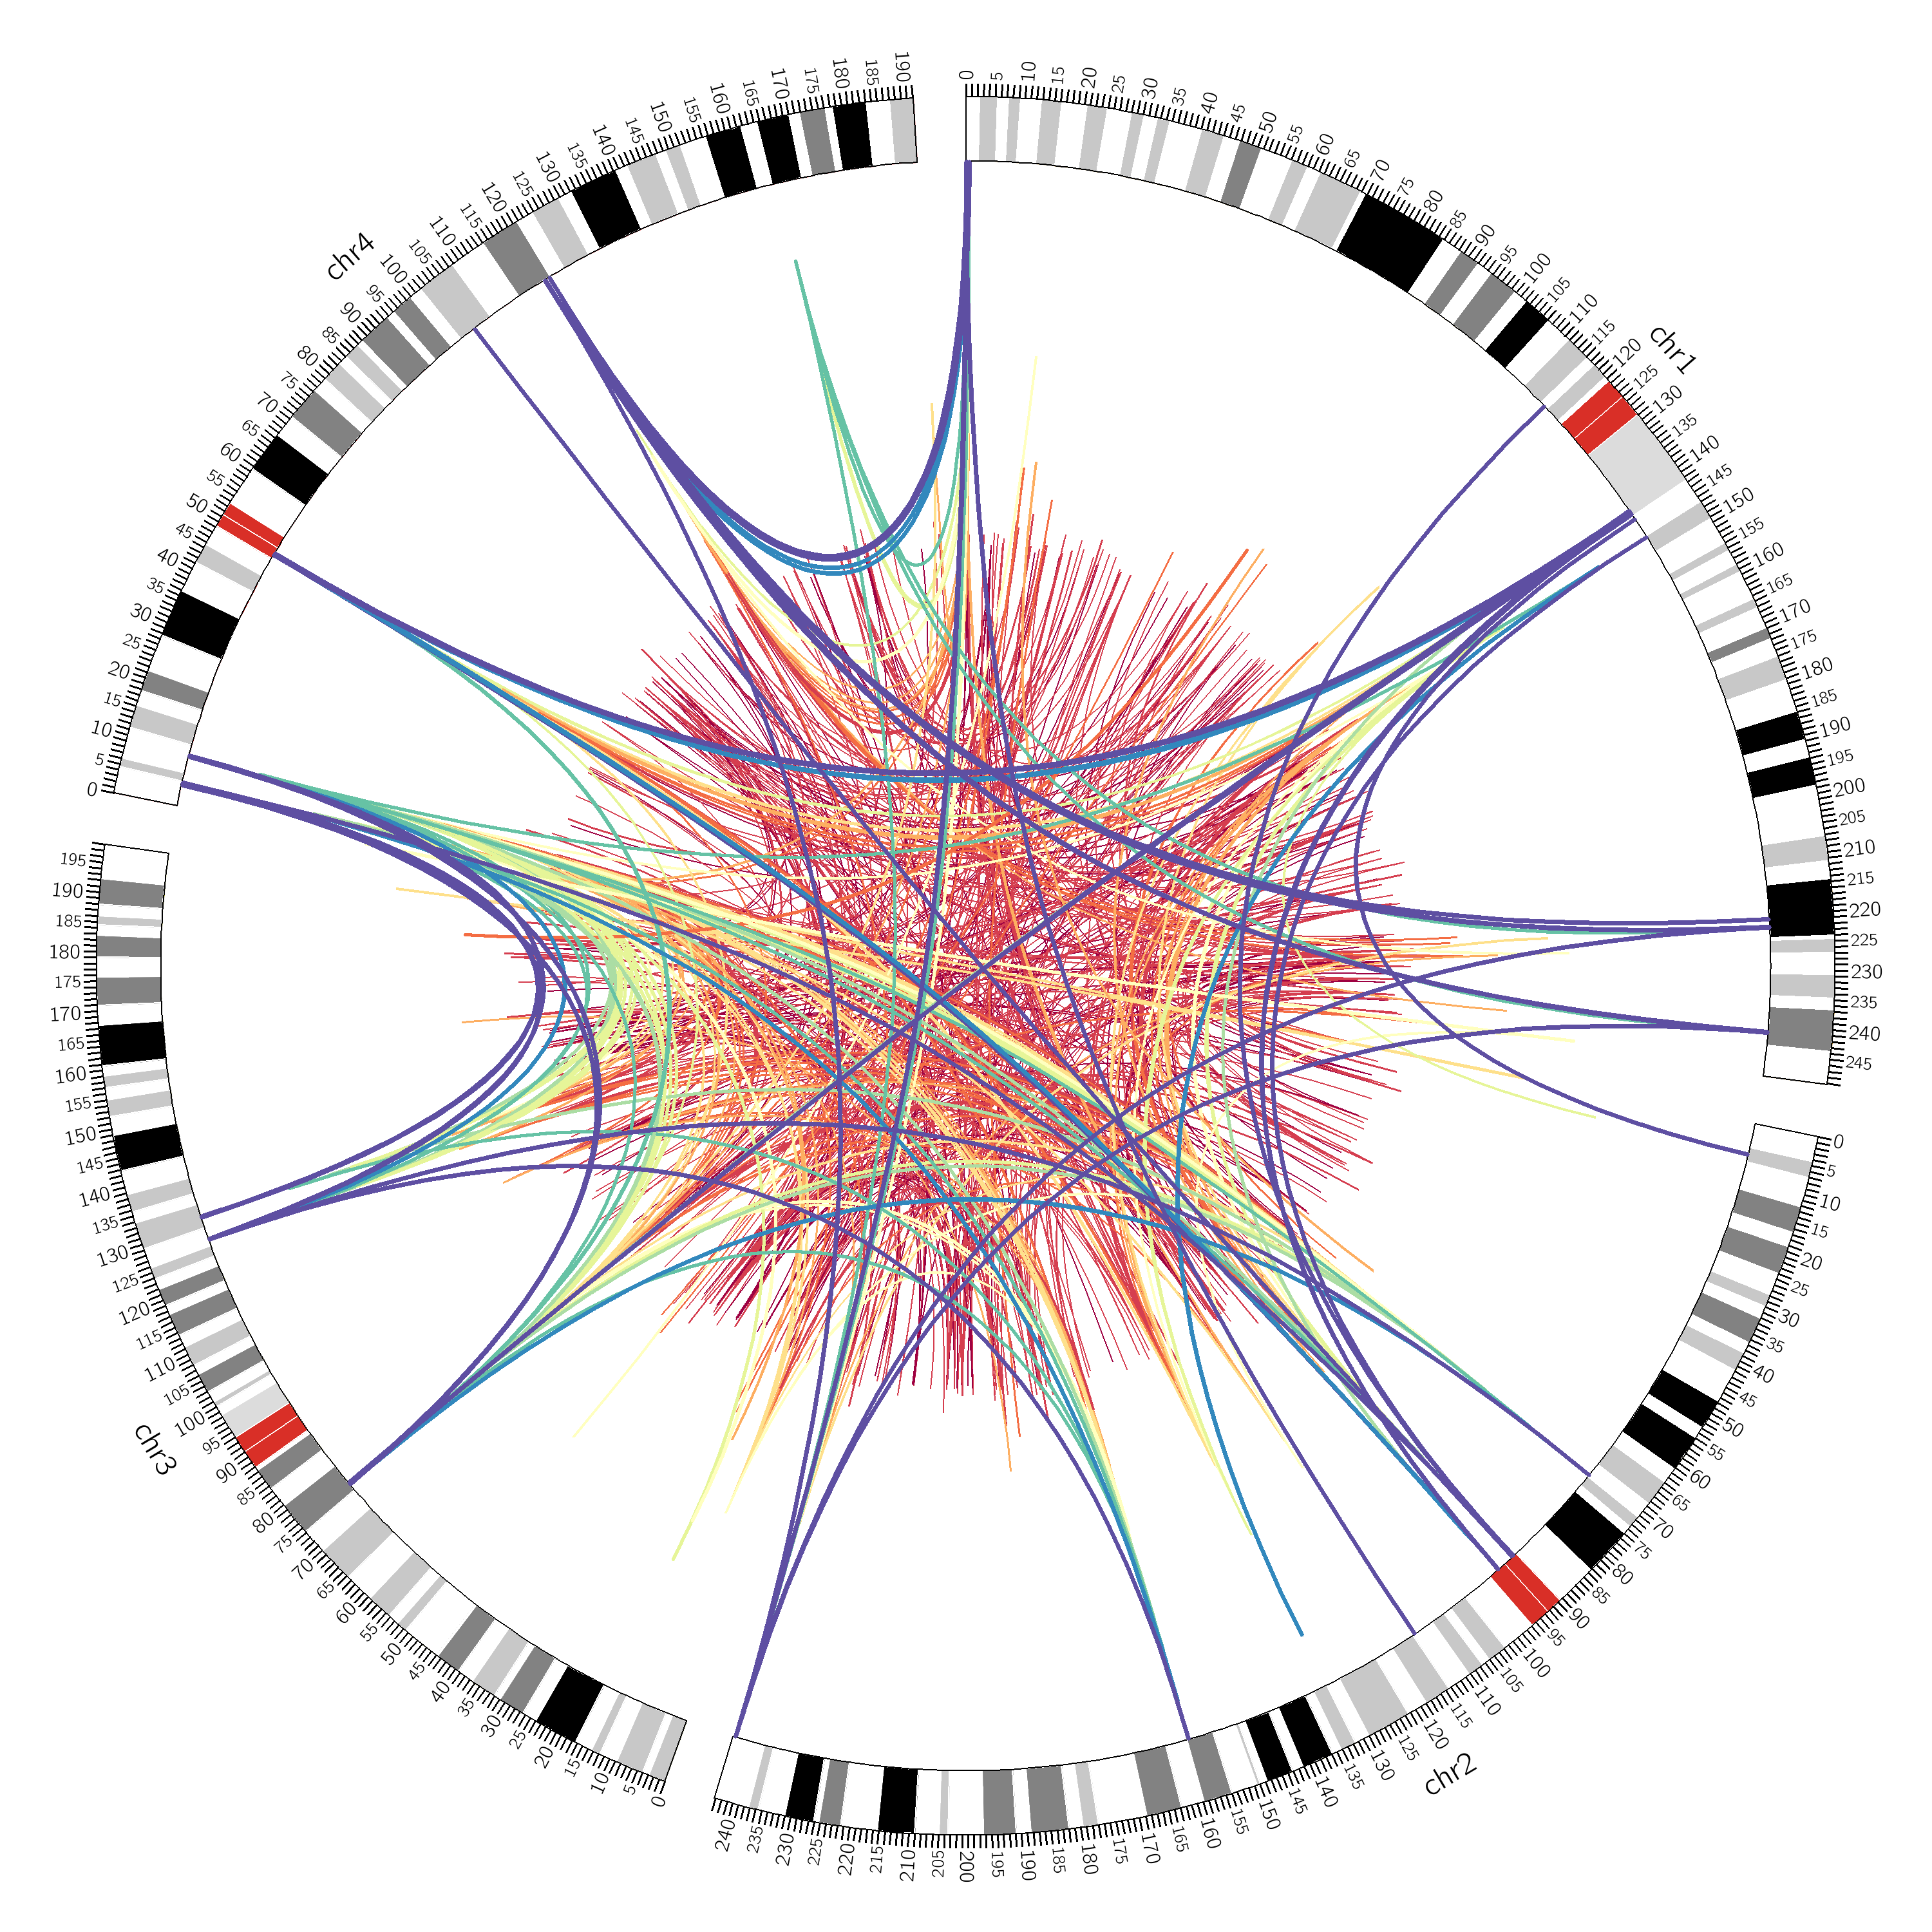

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Links and Relationships series by clicking [here &#10145;](Links_Part8.ipynb).

----